# Informe juego de la vida
* Resultados que se espera del simulador

El objetivo es experimentar a partir unos patrones simples para realizar un elice de manera infinita, a parir de esto crear un circulo infinitos, y por ultimo crear figuras complejas hasta alcanzar la muerte definitiva.
    
Patrones para que las celulas se mantengan con vida por mas tiempo.
<p>
Numero de celulas iniciales = 12.

![titulo](jv1.png)



* Plan de experimentacion.

Se va a usar un cuadrado sin vertices.

In [6]:
#!/usr/bin/env python3

import sys
import turtle
import random

CELL_SIZE = 10                  # Measured in pixels

class LifeBoard:
    """Encapsula una tabla de vida

    Atributos:
    xsize, ysize: tamaño horizontal y vertical del tablero.
    estado: conjunto que contiene (x, y) coordenadas para celdas vivas.

    Métodos:
    display (update_board): muestra el estado de la placa en pantalla.
    borrar () - borrar todo el tablero
    makeRandom () - llena el tablero al azar
    set (x, y) - establece la celda dada a Live; no actualiza la pantalla
    toggle (x, y) - cambia la celda dada de vivo a muerto, o vicio
                   versa, y actualizar la pantalla.

    """
    def __init__(self, xsize, ysize):
        """Create a new LifeBoard instance.

        scr -- curses screen object to use for display
        char -- character used to render live cells (default: '*')
        """
        self.state = set()
        self.xsize, self.ysize = xsize, ysize

    def is_legal(self, x, y):
        "Returns true if the x,y coordinates are legal for this board."
        return (0 <= x < self.xsize) and (0 <= y < self.ysize)

    def set(self, x, y):
        """Set a cell to the live state."""
        if not self.is_legal(x, y):
            raise ValueError("Coordinates {}, {} out of range 0..{}, 0..{}".format(
                    x, y, self.xsize, self.ysize))
                             
        key = (x, y)
        self.state.add(key)

    def makeRandom(self):
        "Fill the board with a random pattern"
        self.erase()
        for i in range(0, self.xsize):
            for j in range(0, self.ysize):
                if random.random() > 0.5:
                    self.set(i, j)

    def toggle(self, x, y):
        """Toggle a cell's state between live and dead."""
        if not self.is_legal(x, y):
            raise ValueError("Coordinates {}, {} out of range 0..{}, 0..{}".format(
                    x, y, self.xsize, self.ysize))
        key = (x, y)
        if key in self.state:
            self.state.remove(key)
        else:
            self.state.add(key)

    def erase(self):
        """Clear the entire board."""
        self.state.clear()
   
    def step(self):
        "Compute one generation, updating the display."
        nuevaCelula = 0
        muerteCelula = 0
        sobreviviente = 0
        d = set()
        for i in range(self.xsize):
            x_range = range( max(0, i-1), min(self.xsize, i+2) )
            for j in range(self.ysize):
                s = 0
                live = ((i,j) in self.state)
                for yp in range( max(0, j-1), min(self.ysize, j+2) ):
                    for xp in x_range:
                        if (xp, yp) in self.state:
                            s += 1

                # Subtract the central cell's value; it doesn't count.
                s -= live             
                #print(d)
                #print(i, j, s, live)
                if s == 3:
                    # Birth
                    nuevaCelula = nuevaCelula + 1
                    d.add((i,j))
                elif s == 2 and live: 
                    # Survival
                    sobreviviente = sobreviviente + 1
                    d.add((i,j))
                    
                elif live:
                    muerteCelula = muerteCelula +1
                    # Death
                    pass

        self.state = d
        print("Nueva Celula ")
        print(nuevaCelula)
        print("Muere Celula ")
        print(muerteCelula)
        print("Sobrevivientes")
        print(sobreviviente)
        print(paso)

    #
    # Display-related methods
    #                    
    def draw(self, x, y):
        "Update the cell (x,y) on the display."
        turtle.penup()
        key = (x, y)
        if key in self.state:
            turtle.setpos(x*CELL_SIZE, y*CELL_SIZE)
            turtle.color('black')
            turtle.pendown()
            turtle.setheading(0)
            turtle.begin_fill()
            for i in range(4):
                turtle.forward(CELL_SIZE-1)
                turtle.left(90)
            turtle.end_fill()
            
    def display(self):
        """Draw the whole board"""
        turtle.clear()
        for i in range(self.xsize):
            for j in range(self.ysize):
                self.draw(i, j)
        turtle.update()


def display_help_window():
    from turtle import TK
    root = TK.Tk()
    frame = TK.Frame()
    canvas = TK.Canvas(root, width=300, height=200, bg="white")
    canvas.pack()
    help_screen = turtle.TurtleScreen(canvas)
    help_t = turtle.RawTurtle(help_screen)
    help_t.penup()
    help_t.hideturtle()
    help_t.speed('fastest')

    width, height = help_screen.screensize()
    line_height = 20
    y = height // 2 - 30
    for s in ("Hacer click en las celdas",
              "Comandos",
              " E)Limpiar tabla",
              " R)Aleatorio",
              " S)Paso por Paso",
              " C)Correr -- Usar S para detener",
              " Q)Salir"):
        help_t.setpos(-(width / 2), y)
        help_t.write(s, font=('sans-serif', 14, 'normal'))
        y -= line_height
    

def main():
    display_help_window()

    scr = turtle.Screen()
    turtle.mode('standard')
    xsize, ysize = scr.screensize()
    turtle.setworldcoordinates(0, 0, xsize, ysize)

    turtle.hideturtle()
    turtle.speed('fastest')
    turtle.tracer(0, 0)
    turtle.penup()

    board = LifeBoard(xsize // CELL_SIZE, 1 + ysize // CELL_SIZE)

    # Set up mouse bindings
    def toggle(x, y):
        cell_x = x // CELL_SIZE
        cell_y = y // CELL_SIZE
        if board.is_legal(cell_x, cell_y):
            board.toggle(cell_x, cell_y)
            board.display()

    turtle.onscreenclick(turtle.listen)
    turtle.onscreenclick(toggle)

    board.makeRandom()
    board.display()

    # Ingreso por teclado
    # E: Limpiar. R: Celulas aleatorias. Q: Salir. 
    def erase():
        board.erase()
        board.display()
    turtle.onkey(erase, 'e')

    def makeRandom():
        board.makeRandom()
        board.display()
    turtle.onkey(makeRandom, 'r')

    turtle.onkey(sys.exit, 'q')

    continuous = False
    def step_once():
        nonlocal continuous
        continuous = False
        perform_step()

    def step_continuous():
        nonlocal continuous
        continuous = True
        perform_step()

    def perform_step():
        board.step()
        board.display()
        # In continuous mode, we set a timer to display another generation
        # after 25 millisenconds.
        if continuous:
            turtle.ontimer(perform_step, 500)

    turtle.onkey(step_once, 's')
    turtle.onkey(step_continuous, 'c')

    # Enter the Tk main loop
    turtle.listen()
    turtle.mainloop()

if __name__ == '__main__':
    main()

Nueva Celula 
48
Muere Celula 
24
Sobrevivientes
4


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/jorge/anaconda3/envs/entornoSimulacion/lib/python3.4/tkinter/__init__.py", line 1538, in __call__
    return self.func(*args)
  File "/home/jorge/anaconda3/envs/entornoSimulacion/lib/python3.4/turtle.py", line 686, in eventfun
    fun()
  File "<ipython-input-6-d394a4bfb58e>", line 215, in step_once
    perform_step()
  File "<ipython-input-6-d394a4bfb58e>", line 223, in perform_step
    board.step()
  File "<ipython-input-6-d394a4bfb58e>", line 111, in step
    print(paso)
NameError: name 'paso' is not defined


Patrones simples de celulas, se obtiene un elice de forma infinita.
![titulo](img1.png)

Luego se agrego una pared a estas interacciones, y se obtiene circulos con interacciones infinitas.
![titulo](img2.png)

Si agrego una pared a cada lado, tendriamos otra interaccion de circulos infinita pero con la diferencia de que las celulas se mantienen fijas.
![titulo](img3.png)

La forma de romper con este ciclo es encenrando al marco con celulas, generando nuevas elices e interesantes figuras.
![titulo](jv7.png) ![titulo](img4.png) ![titulo](img5.png) ![titulo](jv18.png)


Una grafica del numero de celulas vidas en cada interaccion.

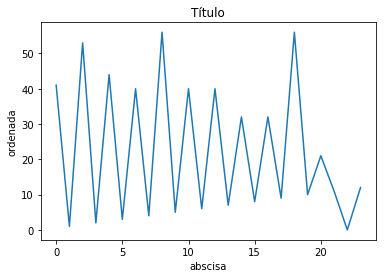

In [11]:
import simpy
import matplotlib.pyplot as pp
import math
import numpy as np
import matplotlib.pyplot as plt

lista1 = [41,1,53,2,44,3,40,4, 56, 5, 40, 6, 40, 7, 32, 8, 32, 9, 56, 10, 21, 11, 0, 12]
plt.plot(lista1)   # Dibuja el gráfico
plt.title("Título")   # Establece el título del gráfico
plt.xlabel("abscisa")   # Establece el título del eje x 
plt.ylabel("ordenada")   # Establece el título del eje y